In [1]:
# Nguyen Hai Duong
# nhduong_3010@live.com
# Chonnam National University
# 2018.01.21

# Overview
- MNIST dataset
  + Goal: recognizing handwritten digits
  + Input: a 28x28 image
  + Output: class label (0, 1,..., 9)
- Defining an MLP for MNIST
- Training and evaluating an MLP

# Import libraries

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import SGD

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
num_classes = 10   # 10 classes: 0, 1,..., 9

# (1) Data

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# (2) Declare model

In [4]:
# 28x28 MNIST image
input_image = Input(shape=(28, 28), name='Input')

# matrix ---> vector
x = Flatten(name='flatten')(input_image)

# FC layers + dropout
x = Dense(units=512, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2, name='dropout1')(x)

x = Dense(units=512, activation='relu', name='fc2')(x)
x = Dropout(rate=0.2, name='dropout2')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_10ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mnist_mlp')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout2 (Dropout)           (None, 512)               0         
_________________________________________________________________
fc3_10ways_softmax (Dense)   (None, 10)                5130      
Total para

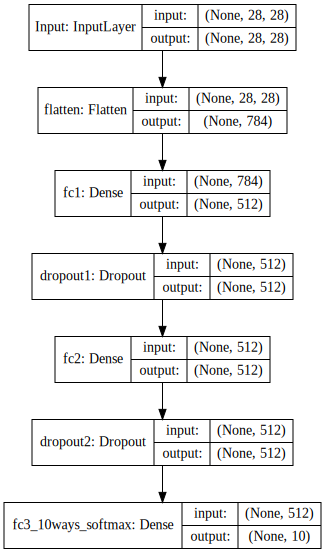

In [5]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# (3) Train defined model
- Note that the training history including loss and accuracy will be save in 'history' variable
- In case your system runs out of memory (OOM), try to decrease batch size

In [40]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.01
model.compile(loss=loss, optimizer=SGD(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 30

starting_time = time.time()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 57us/step - loss: 1.2237 - acc: 0.6756 - val_loss: 0.5462 - val_acc: 0.8630
Epoch 2/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.5363 - acc: 0.8468 - val_loss: 0.3791 - val_acc: 0.8965
Epoch 3/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.4318 - acc: 0.8745 - val_loss: 0.3262 - val_acc: 0.9072
Epoch 4/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.3814 - acc: 0.8895 - val_loss: 0.2971 - val_acc: 0.9147
Epoch 5/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.3462 - acc: 0.9001 - val_loss: 0.2764 - val_acc: 0.9204
Epoch 6/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3233 - acc: 0.9061 - val_loss: 0.2590 - val_acc: 0.9244
Epoch 7/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3013 - acc: 0.9122 - val_loss: 0.2439 - val_acc

### Training time
- Training time with GTX 1080 is about 1.4402 minutes for 30 epochs
- Training time with Core i7 is around 3.0493 minutes for 30 epochs

# (4) Evaluate trained model

In [7]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 61us/step
Test loss: 0.11284465673938393
Test accuracy: 0.9657


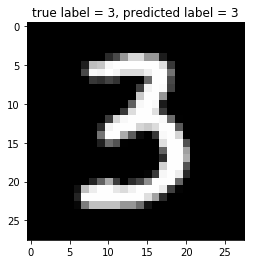

In [32]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img, cmap='gray')
plt.title('true label = %d, predicted label = %d' % (test_label, pred_label))
plt.show()